# Проверьте гипотез интернет-магазина «Стримчик»

Вы работаете в интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Вам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.
Перед вами данные до 2016 года. Представим, что сейчас декабрь 2016 г., и вы планируете кампанию на 2017-й. Нужно отработать принцип работы с данными. Неважно, прогнозируете ли вы продажи на 2017 год по данным 2016-го или же 2027-й — по данным 2026 года.
В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».

# Шаг 1. Откройте файл с данными и изучите общую информацию

In [3]:
import pandas as pd
import numpy as np
import matplotlib as plt
import matplotlib.pyplot as plt
import math
import seaborn as sns
from math import factorial
from scipy import stats as st
import os
from IPython.display import display, HTML

In [2]:
data = pd.read_csv('/datasets/games.csv')
data

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [7]:
display(data.info())
display(data.describe(include='all'))
for columns in data.columns:
    display(columns)
    display(data[columns].unique())
    display(data[columns].value_counts())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
Name               16713 non-null object
Platform           16715 non-null object
Year_of_Release    16446 non-null float64
Genre              16713 non-null object
NA_sales           16715 non-null float64
EU_sales           16715 non-null float64
JP_sales           16715 non-null float64
Other_sales        16715 non-null float64
Critic_Score       8137 non-null float64
User_Score         10014 non-null object
Rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


None

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
count,16713,16715,16446.000000,16713,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000,10014,9949
unique,11559,31,NaN,12,NaN,NaN,NaN,NaN,NaN,96,8
top,Need for Speed: Most Wanted,PS2,NaN,Action,NaN,NaN,NaN,NaN,NaN,tbd,E
freq,12,2161,NaN,3369,NaN,NaN,NaN,NaN,NaN,2424,3990
mean,NaN,NaN,2006.484616,NaN,0.263377,0.145060,0.077617,0.047342,68.967679,NaN,NaN
std,NaN,NaN,5.877050,NaN,0.813604,0.503339,0.308853,0.186731,13.938165,NaN,NaN
min,NaN,NaN,1980.000000,NaN,0.000000,0.000000,0.000000,0.000000,13.000000,NaN,NaN
25%,NaN,NaN,2003.000000,NaN,0.000000,0.000000,0.000000,0.000000,60.000000,NaN,NaN
50%,NaN,NaN,2007.000000,NaN,0.080000,0.020000,0.000000,0.010000,71.000000,NaN,NaN
75%,NaN,NaN,2010.000000,NaN,0.240000,0.110000,0.040000,0.030000,79.000000,NaN,NaN


'Name'

array(['Wii Sports', 'Super Mario Bros.', 'Mario Kart Wii', ...,
       'Woody Woodpecker in Crazy Castle 5', 'LMA Manager 2007',
       'Haitaka no Psychedelica'], dtype=object)

Need for Speed: Most Wanted                   12
LEGO Marvel Super Heroes                       9
FIFA 14                                        9
Madden NFL 07                                  9
Ratatouille                                    9
                                              ..
Final Fantasy Anthology                        1
Donkey Kong GB: Dinky Kong & Dixie Kong        1
Taiko no Tatsujin: Waku Waku Anime Matsuri     1
Pachinko Wars II                               1
Metal Max 4: Gekkou no Diva                    1
Name: Name, Length: 11559, dtype: int64

'Platform'

array(['Wii', 'NES', 'GB', 'DS', 'X360', 'PS3', 'PS2', 'SNES', 'GBA',
       'PS4', '3DS', 'N64', 'PS', 'XB', 'PC', '2600', 'PSP', 'XOne',
       'WiiU', 'GC', 'GEN', 'DC', 'PSV', 'SAT', 'SCD', 'WS', 'NG', 'TG16',
       '3DO', 'GG', 'PCFX'], dtype=object)

PS2     2161
DS      2151
PS3     1331
Wii     1320
X360    1262
PSP     1209
PS      1197
PC       974
XB       824
GBA      822
GC       556
3DS      520
PSV      430
PS4      392
N64      319
XOne     247
SNES     239
SAT      173
WiiU     147
2600     133
NES       98
GB        98
DC        52
GEN       29
NG        12
SCD        6
WS         6
3DO        3
TG16       2
PCFX       1
GG         1
Name: Platform, dtype: int64

'Year_of_Release'

array([2006., 1985., 2008., 2009., 1996., 1989., 1984., 2005., 1999.,
       2007., 2010., 2013., 2004., 1990., 1988., 2002., 2001., 2011.,
       1998., 2015., 2012., 2014., 1992., 1997., 1993., 1994., 1982.,
       2016., 2003., 1986., 2000.,   nan, 1995., 1991., 1981., 1987.,
       1980., 1983.])

2008.0    1427
2009.0    1426
2010.0    1255
2007.0    1197
2011.0    1136
2006.0    1006
2005.0     939
2002.0     829
2003.0     775
2004.0     762
2012.0     653
2015.0     606
2014.0     581
2013.0     544
2016.0     502
2001.0     482
1998.0     379
2000.0     350
1999.0     338
1997.0     289
1996.0     263
1995.0     219
1994.0     121
1993.0      62
1981.0      46
1992.0      43
1991.0      41
1982.0      36
1986.0      21
1989.0      17
1983.0      17
1990.0      16
1987.0      16
1988.0      15
1985.0      14
1984.0      14
1980.0       9
Name: Year_of_Release, dtype: int64

'Genre'

array(['Sports', 'Platform', 'Racing', 'Role-Playing', 'Puzzle', 'Misc',
       'Shooter', 'Simulation', 'Action', 'Fighting', 'Adventure',
       'Strategy', nan], dtype=object)

Action          3369
Sports          2348
Misc            1750
Role-Playing    1498
Shooter         1323
Adventure       1303
Racing          1249
Platform         888
Simulation       873
Fighting         849
Strategy         683
Puzzle           580
Name: Genre, dtype: int64

'NA_sales'

array([4.136e+01, 2.908e+01, 1.568e+01, 1.561e+01, 1.127e+01, 2.320e+01,
       1.128e+01, 1.396e+01, 1.444e+01, 2.693e+01, 9.050e+00, 9.710e+00,
       9.000e+00, 8.920e+00, 1.500e+01, 9.010e+00, 7.020e+00, 9.430e+00,
       1.278e+01, 4.740e+00, 6.380e+00, 1.083e+01, 9.540e+00, 9.660e+00,
       8.410e+00, 6.060e+00, 3.430e+00, 5.510e+00, 6.850e+00, 9.040e+00,
       5.890e+00, 6.030e+00, 9.700e+00, 5.280e+00, 4.990e+00, 8.250e+00,
       8.520e+00, 5.540e+00, 6.990e+00, 6.620e+00, 5.030e+00, 5.990e+00,
       3.960e+00, 2.500e+00, 7.970e+00, 6.910e+00, 4.340e+00, 4.350e+00,
       3.010e+00, 6.160e+00, 6.760e+00, 4.020e+00, 4.890e+00, 2.960e+00,
       4.760e+00, 5.010e+00, 6.730e+00, 5.950e+00, 3.660e+00, 5.550e+00,
       7.040e+00, 6.650e+00, 3.880e+00, 5.800e+00, 4.100e+00, 5.930e+00,
       4.360e+00, 5.700e+00, 2.030e+00, 4.400e+00, 5.050e+00, 3.540e+00,
       1.120e+00, 6.820e+00, 1.750e+00, 3.740e+00, 1.060e+00, 2.790e+00,
       2.910e+00, 9.900e-01, 2.570e+00, 2.990e+00, 

0.00    4508
0.02     576
0.03     561
0.04     549
0.01     545
        ... 
4.98       1
4.21       1
6.82       1
5.05       1
9.00       1
Name: NA_sales, Length: 402, dtype: int64

'EU_sales'

array([2.896e+01, 3.580e+00, 1.276e+01, 1.093e+01, 8.890e+00, 2.260e+00,
       9.140e+00, 9.180e+00, 6.940e+00, 6.300e-01, 1.095e+01, 7.470e+00,
       6.180e+00, 8.030e+00, 4.890e+00, 8.490e+00, 9.090e+00, 4.000e-01,
       3.750e+00, 9.200e+00, 4.460e+00, 2.710e+00, 3.440e+00, 5.140e+00,
       5.490e+00, 3.900e+00, 5.350e+00, 3.170e+00, 5.090e+00, 4.240e+00,
       5.040e+00, 5.860e+00, 3.680e+00, 4.190e+00, 5.730e+00, 3.590e+00,
       4.510e+00, 2.550e+00, 4.020e+00, 4.370e+00, 6.310e+00, 3.450e+00,
       2.810e+00, 2.850e+00, 3.490e+00, 1.000e-02, 3.350e+00, 2.040e+00,
       3.070e+00, 3.870e+00, 3.000e+00, 4.820e+00, 3.640e+00, 2.150e+00,
       3.690e+00, 2.650e+00, 2.560e+00, 3.110e+00, 3.140e+00, 1.940e+00,
       1.950e+00, 2.470e+00, 2.280e+00, 3.420e+00, 3.630e+00, 2.360e+00,
       1.710e+00, 1.850e+00, 2.790e+00, 1.240e+00, 6.120e+00, 1.530e+00,
       3.470e+00, 2.240e+00, 5.010e+00, 2.010e+00, 1.720e+00, 2.070e+00,
       6.420e+00, 3.860e+00, 4.500e-01, 3.480e+00, 

0.00    5870
0.01    1494
0.02    1308
0.03     926
0.04     709
        ... 
3.59       1
4.02       1
2.24       1
2.27       1
3.75       1
Name: EU_sales, Length: 307, dtype: int64

'JP_sales'

array([3.770e+00, 6.810e+00, 3.790e+00, 3.280e+00, 1.022e+01, 4.220e+00,
       6.500e+00, 2.930e+00, 4.700e+00, 2.800e-01, 1.930e+00, 4.130e+00,
       7.200e+00, 3.600e+00, 2.400e-01, 2.530e+00, 9.800e-01, 4.100e-01,
       3.540e+00, 4.160e+00, 6.040e+00, 4.180e+00, 3.840e+00, 6.000e-02,
       4.700e-01, 5.380e+00, 5.320e+00, 5.650e+00, 1.870e+00, 1.300e-01,
       3.120e+00, 3.600e-01, 1.100e-01, 4.350e+00, 6.500e-01, 7.000e-02,
       8.000e-02, 4.900e-01, 3.000e-01, 2.660e+00, 2.690e+00, 4.800e-01,
       3.800e-01, 5.330e+00, 1.910e+00, 3.960e+00, 3.100e+00, 1.100e+00,
       1.200e+00, 1.400e-01, 2.540e+00, 2.140e+00, 8.100e-01, 2.120e+00,
       4.400e-01, 3.150e+00, 1.250e+00, 4.000e-02, 0.000e+00, 2.470e+00,
       2.230e+00, 1.690e+00, 1.000e-02, 3.000e+00, 2.000e-02, 4.390e+00,
       1.980e+00, 1.000e-01, 3.810e+00, 5.000e-02, 2.490e+00, 1.580e+00,
       3.140e+00, 2.730e+00, 6.600e-01, 2.200e-01, 3.630e+00, 1.450e+00,
       1.310e+00, 2.430e+00, 7.000e-01, 3.500e-01, 

0.00    10514
0.02      741
0.01      706
0.03      546
0.04      397
        ...  
1.16        1
2.12        1
7.20        1
2.17        1
6.50        1
Name: JP_sales, Length: 244, dtype: int64

'Other_sales'

array([8.450e+00, 7.700e-01, 3.290e+00, 2.950e+00, 1.000e+00, 5.800e-01,
       2.880e+00, 2.840e+00, 2.240e+00, 4.700e-01, 2.740e+00, 1.900e+00,
       7.100e-01, 2.150e+00, 1.690e+00, 1.770e+00, 3.960e+00, 1.057e+01,
       5.500e-01, 2.040e+00, 1.360e+00, 4.200e-01, 4.600e-01, 1.410e+00,
       1.780e+00, 5.000e-01, 1.180e+00, 8.000e-01, 1.160e+00, 1.320e+00,
       5.900e-01, 2.380e+00, 1.130e+00, 7.800e-01, 2.420e+00, 1.120e+00,
       1.280e+00, 1.570e+00, 1.300e+00, 1.010e+00, 9.100e-01, 1.790e+00,
       1.970e+00, 8.600e-01, 1.210e+00, 2.300e-01, 7.600e-01, 7.400e-01,
       7.530e+00, 2.900e-01, 1.030e+00, 5.200e-01, 2.110e+00, 1.600e+00,
       1.610e+00, 3.500e-01, 9.700e-01, 1.060e+00, 6.300e-01, 1.500e-01,
       7.900e-01, 9.600e-01, 1.250e+00, 9.000e-01, 8.100e-01, 3.900e-01,
       6.800e-01, 8.500e-01, 1.800e-01, 8.000e-02, 6.700e-01, 7.000e-01,
       4.100e-01, 3.300e-01, 6.000e-01, 5.400e-01, 1.730e+00, 1.230e+00,
       1.600e-01, 1.110e+00, 3.100e-01, 4.800e-01, 

0.00    6601
0.01    3464
0.02    1618
0.03     926
0.04     654
        ... 
0.96       1
1.93       1
0.97       1
1.37       1
1.06       1
Name: Other_sales, Length: 155, dtype: int64

'Critic_Score'

array([76., nan, 82., 80., 89., 58., 87., 91., 61., 97., 95., 77., 88.,
       83., 94., 93., 85., 86., 98., 96., 90., 84., 73., 74., 78., 92.,
       71., 72., 68., 62., 49., 67., 81., 66., 56., 79., 70., 59., 64.,
       75., 60., 63., 69., 50., 25., 42., 44., 55., 48., 57., 29., 47.,
       65., 54., 20., 53., 37., 38., 33., 52., 30., 32., 43., 45., 51.,
       40., 46., 39., 34., 35., 41., 36., 28., 31., 27., 26., 19., 23.,
       24., 21., 17., 22., 13.])

70.0    256
71.0    254
75.0    245
78.0    240
73.0    238
       ... 
20.0      3
17.0      1
22.0      1
13.0      1
21.0      1
Name: Critic_Score, Length: 82, dtype: int64

'User_Score'

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

tbd    2424
7.8     324
8       290
8.2     282
8.3     254
       ... 
1.9       2
1.5       2
0.6       2
9.7       1
0         1
Name: User_Score, Length: 96, dtype: int64

'Rating'

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

E       3990
T       2961
M       1563
E10+    1420
EC         8
K-A        3
RP         3
AO         1
Name: Rating, dtype: int64

# Вывод
Файл имеет пропуски, которые необходимо исправить/оставить.
Так же необходимо изменить тип колонок там, где это необходимо и привести их в нижний регистр.
В колонке user_score есть значения tbd.

Пропуски в оценках критиков и пользователях естественны, так как не все игры набрали необходимое кол-во оценок, либо совсем не популярны.

Пропуски в годе релиза могут быть из-за старых данных(перенос из старой бд в новую), либо при ошибке заполнения.
Тоже самое с рейтингом.

# Шаг 2. Подготовьте данные

In [12]:
# переименовываем колонки
data.rename(str.lower, axis='columns', inplace=True)

In [13]:
# изменяем тип данных, тк в этом столбце только целые числа
data['critic_score'] = data['critic_score'].astype('Int64')

In [14]:
# изменяем тип данных, тк в этом столбце только целые числа
data['year_of_release'] = data['year_of_release'].astype('Int64')

In [15]:
# проверка нан
print(data.query('genre.isnull()'))

      name platform  year_of_release genre  na_sales  eu_sales  jp_sales  \
659    NaN      GEN             1993   NaN      1.78      0.53      0.00   
14244  NaN      GEN             1993   NaN      0.00      0.00      0.03   

       other_sales  critic_score user_score rating  
659           0.08           NaN        NaN    NaN  
14244         0.00           NaN        NaN    NaN  


In [16]:
# нан строки в жанрах бесполезны, так как там нет данных во всех колонках, поэтому убираем их
data = data.query('genre.notnull()')

In [17]:
# изменяем тип данных в user_score, меняя tbd на нан, потому что tbd = рейтинг не откалиброван/неизвестен
data['user_score'] = pd.to_numeric(data['user_score'], errors='coerce')

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [18]:
data['user_score'].unique()

array([8. , nan, 8.3, 8.5, 6.6, 8.4, 8.6, 7.7, 6.3, 7.4, 8.2, 9. , 7.9,
       8.1, 8.7, 7.1, 3.4, 5.3, 4.8, 3.2, 8.9, 6.4, 7.8, 7.5, 2.6, 7.2,
       9.2, 7. , 7.3, 4.3, 7.6, 5.7, 5. , 9.1, 6.5, 8.8, 6.9, 9.4, 6.8,
       6.1, 6.7, 5.4, 4. , 4.9, 4.5, 9.3, 6.2, 4.2, 6. , 3.7, 4.1, 5.8,
       5.6, 5.5, 4.4, 4.6, 5.9, 3.9, 3.1, 2.9, 5.2, 3.3, 4.7, 5.1, 3.5,
       2.5, 1.9, 3. , 2.7, 2.2, 2. , 9.5, 2.1, 3.6, 2.8, 1.8, 3.8, 0. ,
       1.6, 9.6, 2.4, 1.7, 1.1, 0.3, 1.5, 0.7, 1.2, 2.3, 0.5, 1.3, 0.2,
       0.6, 1.4, 0.9, 1. , 9.7])

In [19]:
# создаем столбец с общими продажами по всему миру
data['total_sales'] = data['na_sales'] + data['eu_sales']+ data['jp_sales'] + data['other_sales']
data

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38
...,...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN,0.01
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN,0.01


In [20]:
# удаляем дубликаты
data = data.drop_duplicates().reset_index(drop=True)

# Вывод
Исправлены ошибки в данных, все колонки приведенны к одному виду.
Критических технических ошибок в данных не обнаруженно.

# Шаг 3. Проведите исследовательский анализ данных

In [21]:
# проверяем кол-во выпущенных игр
data_years_stat = data.pivot_table(index='year_of_release', values='total_sales', aggfunc='count')

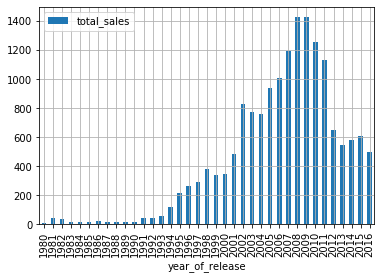

In [22]:
# выход игр резко падает в 2012 году
data_years_stat.plot(kind='bar', y='total_sales', grid=True)

In [23]:
# проверяем продажи игр за все годы.
data_years_stat = data.pivot_table(index='year_of_release', values='total_sales', aggfunc='sum')

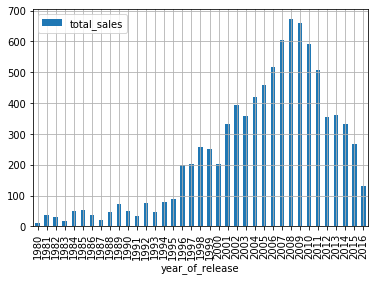

In [24]:
# продажи резко падают в 2012 году
data_years_stat.plot(kind='bar', y='total_sales', grid=True)

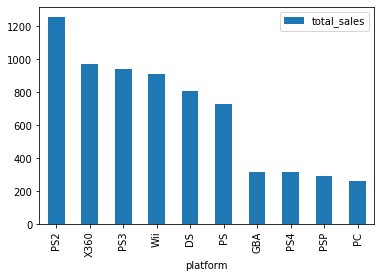

In [25]:
# находим 10 популярных платформ
platforms_info = data.groupby('platform')[['total_sales']].sum()
platforms_info.columns = ['total_sales']
platforms_info.sort_values('total_sales', ascending=False, inplace=True)
platforms_info.head(10).plot(kind='bar')

In [26]:
# создание списка с этими платформами
arr = ['PS2','X360','PS3','Wii','DS','PS','GBA','PS4','PSP','PC']

In [27]:
# создаем дф для сравнения платформ по годам
platforms_df = data[data['platform'].isin(arr)].pivot_table(index=['year_of_release', 'platform']
                                                            , values='total_sales', aggfunc='sum')
platforms_df.reset_index(inplace=True)

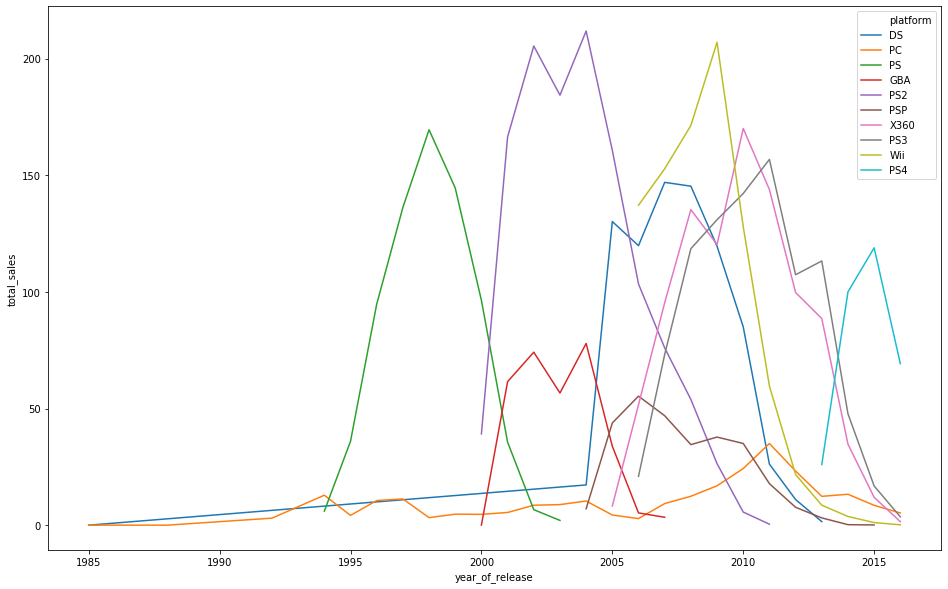

In [54]:
# На данном графике видно, что средняя продолжительность жизни платформ ~ 7 лет
# Каждая из платформ имеет выраженный рост и падение, и, исходя из тенденций, следующий рост будет у PS4
# В 2005 - 2013 была очень большая конкуренция, чего нет в прошлых годах
plt.figure(figsize=(16, 10))
sns.lineplot(x='year_of_release', y='total_sales', hue='platform', data=platforms_df)

In [40]:
# из гистограм и графиков сравнения делаем вывод, что актуальный период - от 2013 года.
data_actual = data[data['year_of_release'] >= 2013]

In [41]:
data_actual.reset_index(inplace=True)

In [42]:
# создаем дф для сравнения платформ по продажам
platforms_actual = data_actual.pivot_table(index=['year_of_release', 'platform']
                                           , values='total_sales', aggfunc='sum')
platforms_actual.reset_index(inplace=True)

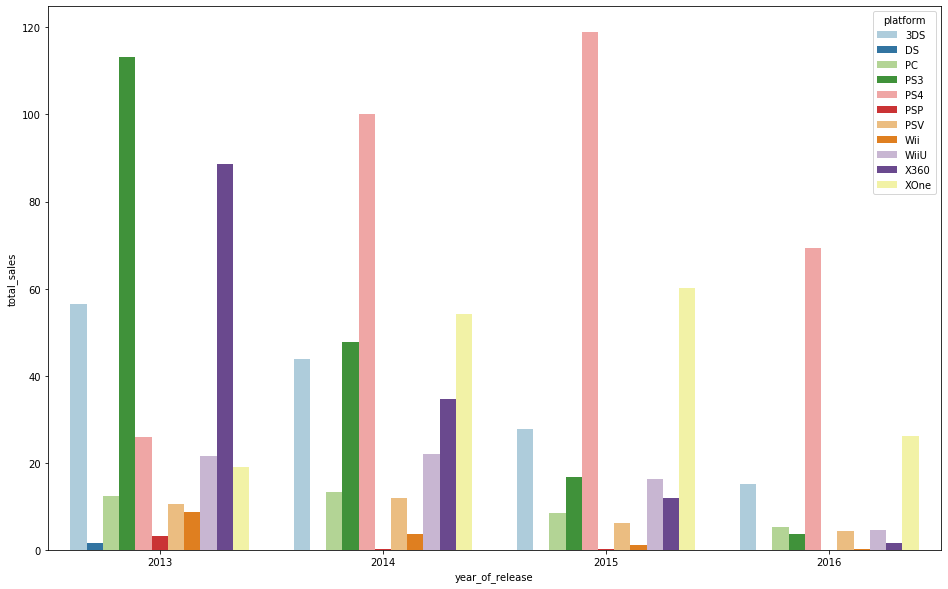

In [49]:
# видим, что самые популярные платформы - PS3-4. За ними идут Xbox-ы (XOne сильно проигрывает своему главному конкуренту PS4)
plt.figure(figsize=(16, 10))
sns.barplot(x='year_of_release', y='total_sales', hue='platform', palette='Paired', data=platforms_actual)

Основные платформы на мировом рынке: PS3, X360, 3DS, PS4, XOne
Наблюдается падение: PS3, X360, 3DS
Наблюдается рост: PS4, XOne
Перспективные платформы: PS4, XOne

/opt/conda/lib/python3.7/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


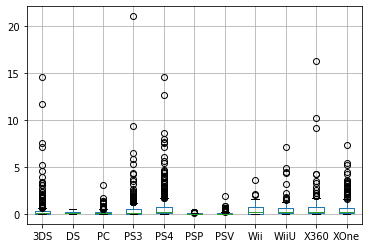

In [24]:
# делаем первичный "ящик с усами" для оценки общей картины
games_sales = data_actual.pivot_table(index='name', columns='platform', values='total_sales', aggfunc='sum')
games_sales.boxplot()
# очень большие выбросы

In [25]:
# создаем функцию для среза выбросов
def delete_out(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    data_IQR = data[(data[column] > (Q1-1.5*IQR)) & (data[column] < (Q3+1.5*IQR))]
    return data_IQR

In [26]:
data_actual['platform'].unique()

array(['PS3', 'X360', 'PS4', '3DS', 'XOne', 'WiiU', 'Wii', 'PC', 'PSV',
       'DS', 'PSP'], dtype=object)

In [27]:
# создаем список актуальных платформ
arr2 = ['X360', 'WiiU', 'Wii', 'PS3','XOne', 'PS4','3DS', 'PC','PSV', 'DS','PSP']

In [28]:
data_actual.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2233 entries, 0 to 2232
Data columns (total 13 columns):
index              2233 non-null int64
name               2233 non-null object
platform           2233 non-null object
year_of_release    2233 non-null Int64
genre              2233 non-null object
na_sales           2233 non-null float64
eu_sales           2233 non-null float64
jp_sales           2233 non-null float64
other_sales        2233 non-null float64
critic_score       991 non-null Int64
user_score         1192 non-null float64
rating             1256 non-null object
total_sales        2233 non-null float64
dtypes: Int64(2), float64(6), int64(1), object(4)
memory usage: 231.3+ KB


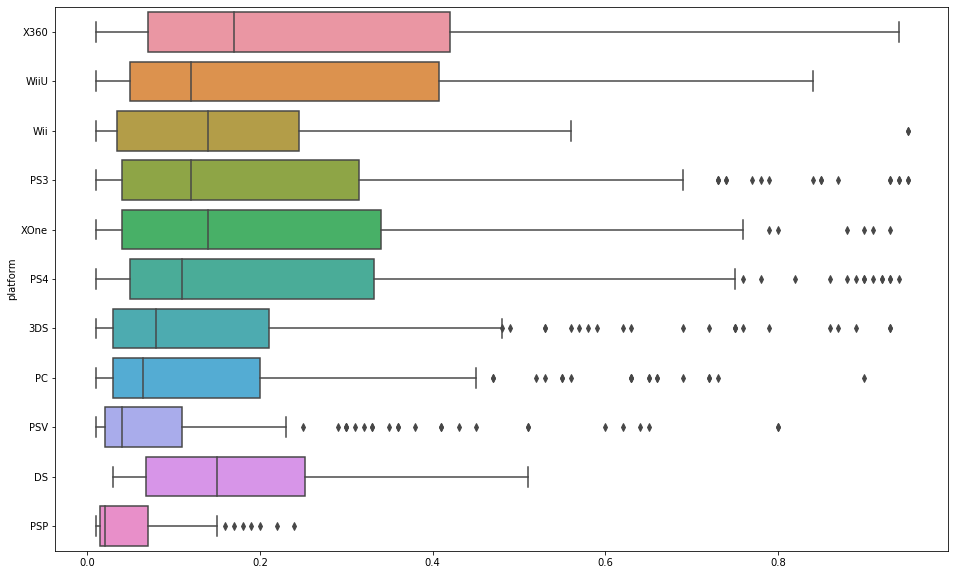

In [29]:
# строим 'ящик с усами', отсекая выбросы для читаемости
data_actual_games_out = delete_out(data_actual, 'total_sales')
data_actual_games_out_stat_1 = data_actual_games_out.pivot_table(index='name', columns='platform', 
                                                               values='total_sales', aggfunc='sum')

plt.figure(figsize=(16, 10))
ax = sns.boxplot(data=data_actual_games_out_stat_1, order = arr2, orient='h')

Видно, что по разбросу и средним значениям лидируют X360 и XOne. Видимо, владельцы данных платформ преимущественно играют только в крупные проекты, либо аудитория ограниченна. Поэтому на общих графиках в общих забегах по продажам, данные платформы отстают от своих конкурентов.
В целом, медиана примерно одинаковая у крупных приставок. 

PC Отстает из-за ценовой политики на игры, которая ниже, чем у приставок.
Самые отстающие - это ручные приставки(кроме 3DS), которые не пользуются большой популярностью.

Имеются выбросы, которые являются популярными играми. Примем то, что данные выбросы учитываются в дальнейшей аналитике.

In [30]:
# проверяем, сколько ушло данных после отсечения выбросов
# ушло 267 строк и это - крупные продажи. Вернемся к прежнему дф
data_actual_games_out.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1966 entries, 267 to 2232
Data columns (total 13 columns):
index              1966 non-null int64
name               1966 non-null object
platform           1966 non-null object
year_of_release    1966 non-null Int64
genre              1966 non-null object
na_sales           1966 non-null float64
eu_sales           1966 non-null float64
jp_sales           1966 non-null float64
other_sales        1966 non-null float64
critic_score       795 non-null Int64
user_score         974 non-null float64
rating             1037 non-null object
total_sales        1966 non-null float64
dtypes: Int64(2), float64(6), int64(1), object(4)
memory usage: 218.9+ KB


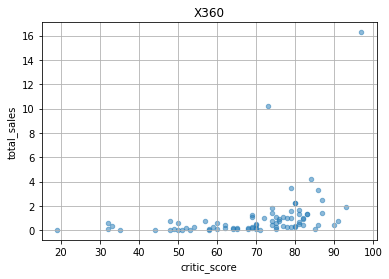

0.3503445460228664


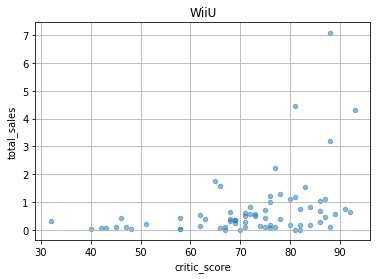

0.3764149065423912


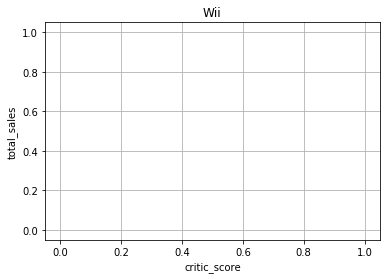

nan


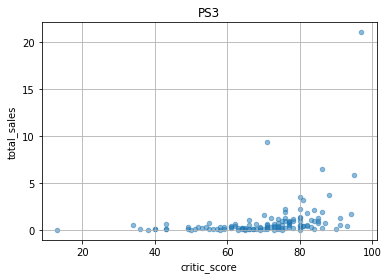

0.3342853393371919


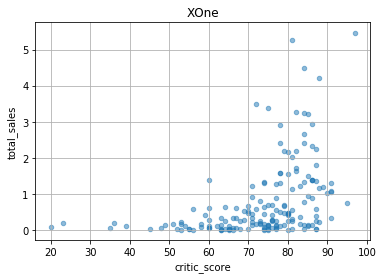

0.4169983280084017


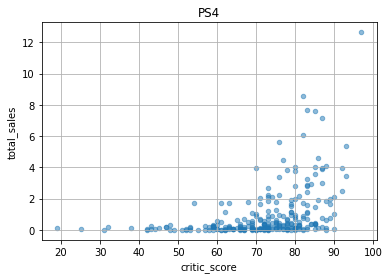

0.40656790206178095


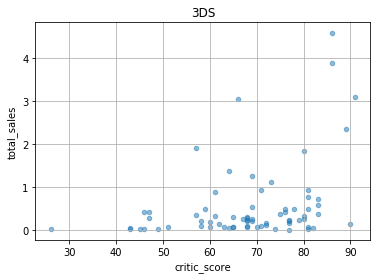

0.3570566142288103


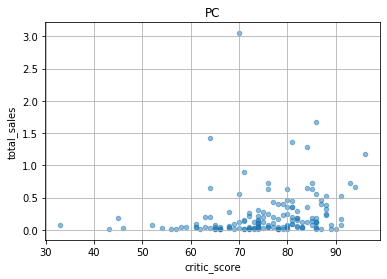

0.19603028294369382


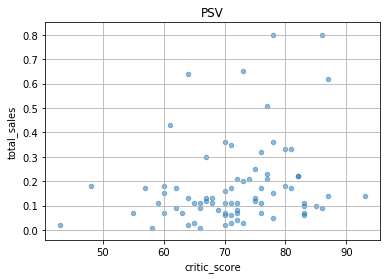

0.2547423503068656


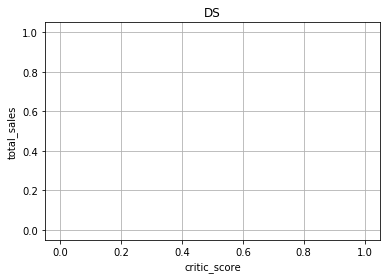

nan


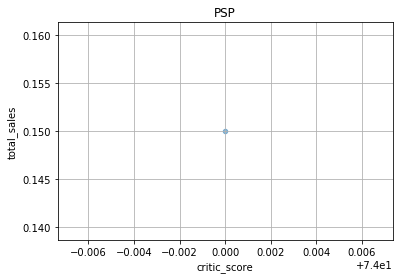

nan


/opt/conda/lib/python3.7/site-packages/numpy/lib/function_base.py:2551: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
/opt/conda/lib/python3.7/site-packages/numpy/lib/function_base.py:2480: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


In [31]:
# Находим взаимосвязь между продажами и оценками критиков
def scatter_corr(data, list, coll1):
    i = 0
    while i <= len(list) - 1:
        name = list[i]
        platform = data[data['platform'] == name]
        platform.plot(kind='scatter', x=coll1, y='total_sales', title=name, grid=True, alpha=0.5)
        plt.show()
        print(platform[coll1].astype('float64').corr(data['total_sales']))
        i += 1
scatter_corr(data_actual, arr2, 'critic_score')

Прослеживается взаимосвязь средней степени в крупных платформах. 

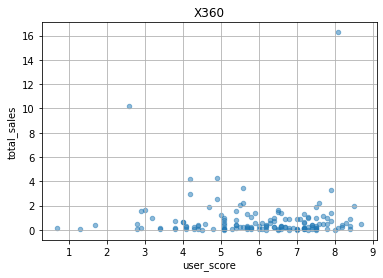

-0.011742185147181342


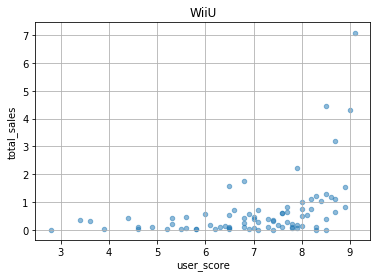

0.4193304819266187


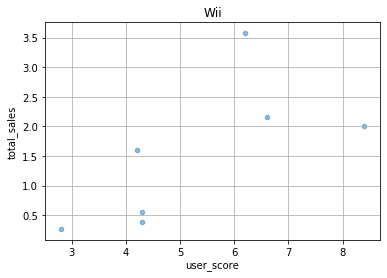

0.6829417215362368


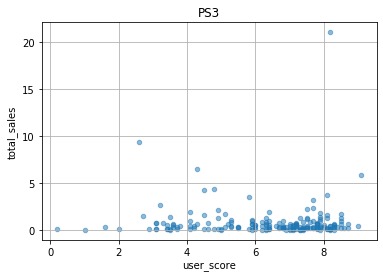

0.0023944027357566925


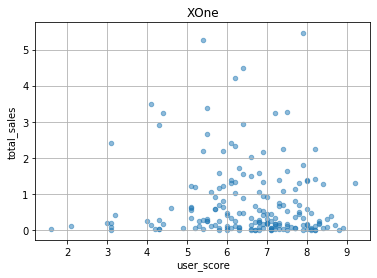

-0.06892505328279414


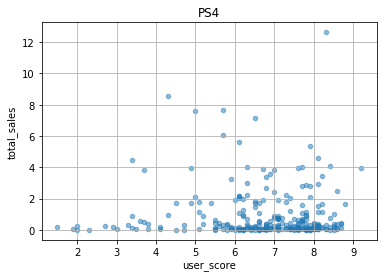

-0.031957110204556424


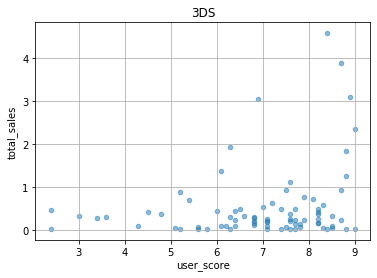

0.24150411773563016


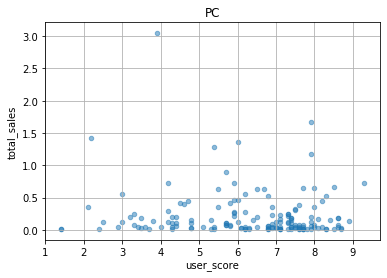

-0.0938418695247674


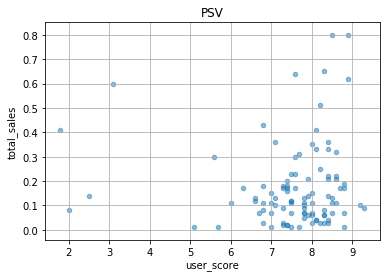

0.0009424723319108626


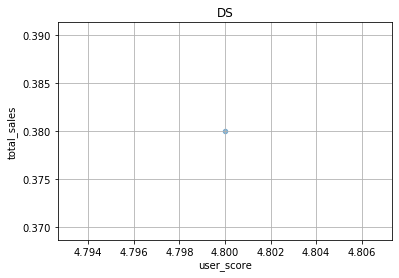

nan


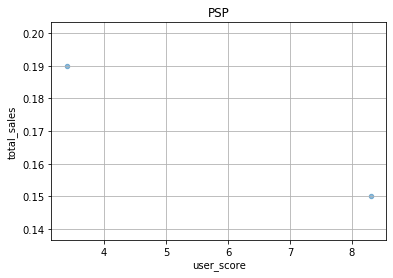

-0.9999999999999999


In [32]:
# Находим взаимосвязь между продажами и оценками пользователей
scatter_corr(data_actual, arr2, 'user_score')

Почти никакая корреляция у крупных платформах, кроме 3DS. Но есть средняя корреляция у Wii.

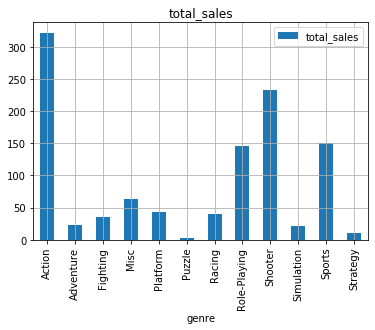

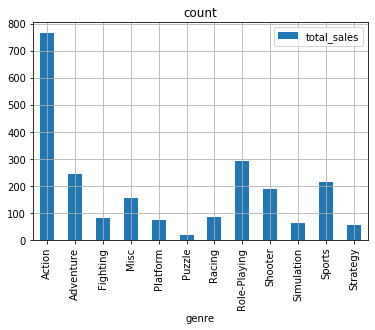

In [33]:
# Находим популярные жанры
data_actual_games_out_stat_2 = data_actual.pivot_table(index='genre', values='total_sales', aggfunc=['sum', 'count'])
data_actual_games_out_stat_2.plot(kind='bar', y='sum', grid=True, title='total_sales')
data_actual_games_out_stat_2.plot(kind='bar', y='count', grid=True, title='count')

# Вывод
По итогу мы выявили необходимый промежуток времени для работы - это все, что дальше 2013 года включительно.
Разбили платформы по популярности и определили средний срок жизни платформ(исключение - PC).
Так же имеются фавориты в платформах и жанрах - PS4 и XOne, которые, по прогнозам должны расти в ледующем году. Данные модели пришли на смену старым собратам, которых уже вытесняют с рынка.

Обнаруженна средняя корреляция между оценками игр критиков и продажами на перспективныфх платформах. Оценки пользователей почти не влияют на продажи.

Cамые популярные жанры: Action, RPG, Adventure, Sports

# Шаг 4. Составьте портрет пользователя каждого региона

In [34]:
# Организуем дф для создания портретов по регионам
data_actual_games_out_stat_3 = data_actual.pivot_table(index=['genre', 'platform', 'rating'],
                                                                  values=['na_sales', 'jp_sales', 'eu_sales']
                                                                 , aggfunc='sum')
data_actual_games_out_stat_3.reset_index(inplace=True)

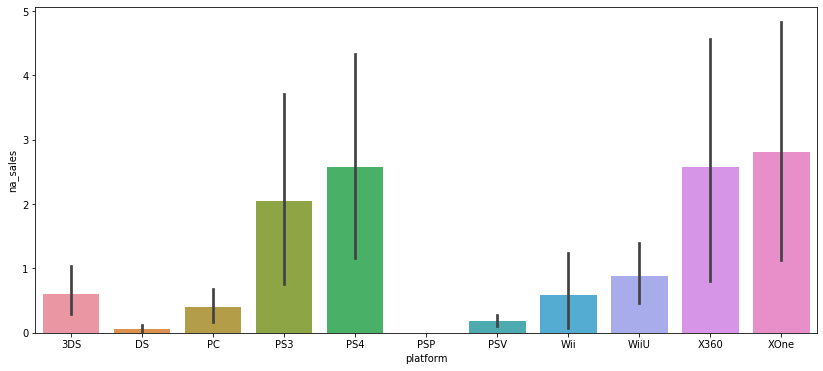

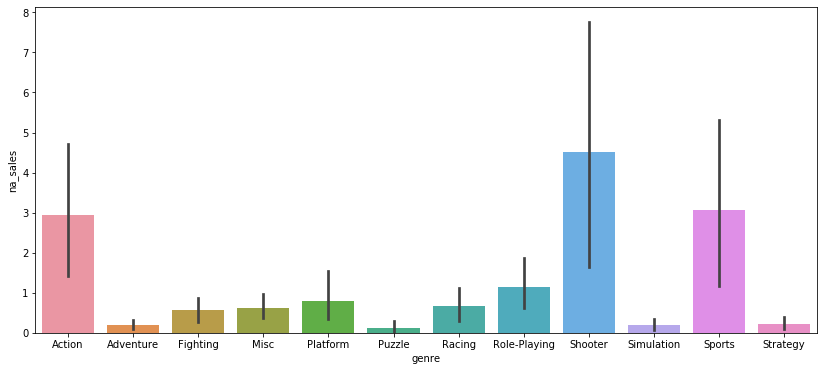

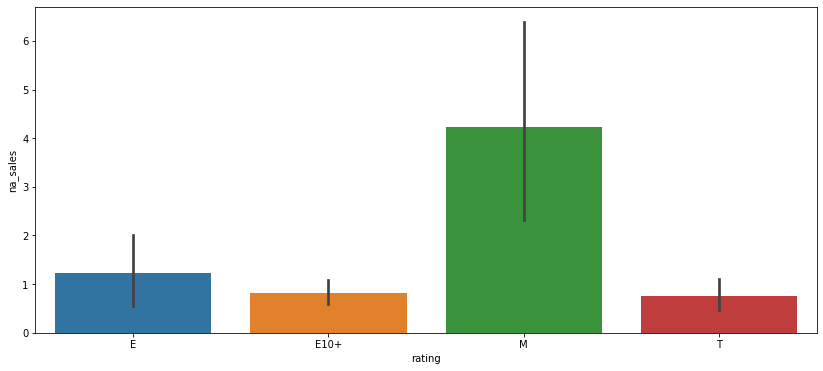

In [35]:
# Создание портрета пользователя для региона na
plt.figure(figsize=(14, 6))
sns.barplot(x='platform', y='na_sales', data=data_actual_games_out_stat_3)
plt.figure(figsize=(14, 6))
sns.barplot(x='genre', y='na_sales', data=data_actual_games_out_stat_3)
plt.figure(figsize=(14, 6))
sns.barplot(x='rating', y='na_sales', data=data_actual_games_out_stat_3)

Данные пользолватели стараются поддерживать платформы производителя своей страны. На первом-втором местах находятся XBOX, на 3-4 PS.
В данном регионе ценятся жанры: Action, Shooter, Sports
Игры покупаются преимущественно с рейтингом для взрослой аудитории.

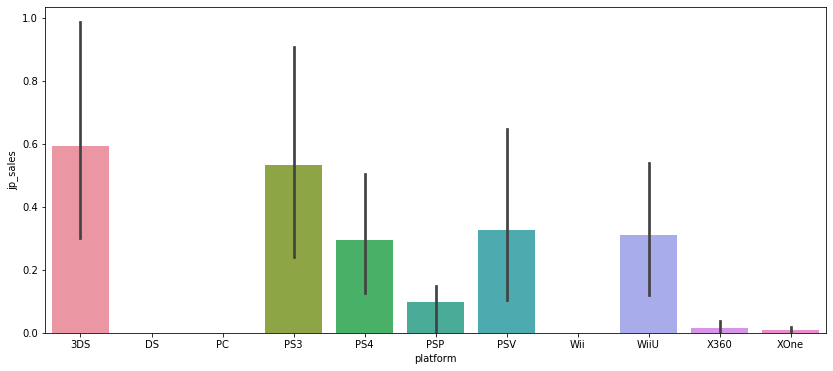

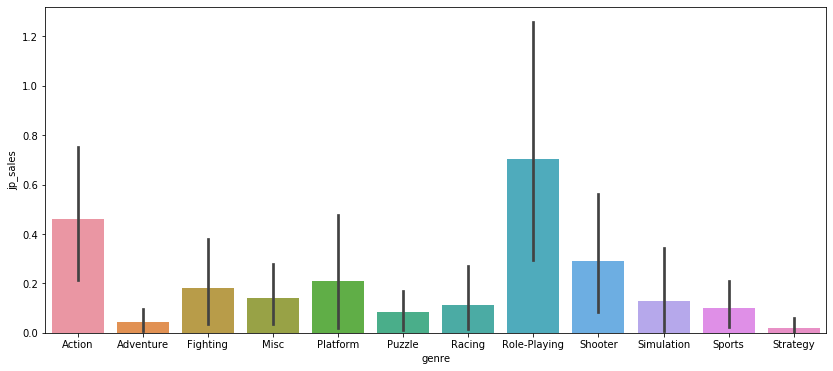

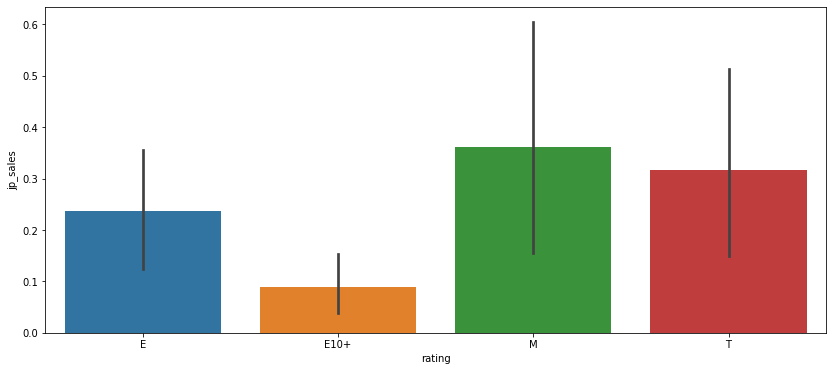

In [36]:
# Создание портрета пользователя для региона jp
plt.figure(figsize=(14, 6))
sns.barplot(x='platform', y='jp_sales', data=data_actual_games_out_stat_3)
plt.figure(figsize=(14, 6))
sns.barplot(x='genre', y='jp_sales', data=data_actual_games_out_stat_3)
plt.figure(figsize=(14, 6))
sns.barplot(x='rating', y='jp_sales', data=data_actual_games_out_stat_3)

Данные пользователи являются патриотами и играют исключительно на платформах, которые разработали в данном регионе. Этьо объясняет отставание - на ящике с усами медиана продаж находится выше, но его лишили восточного рынка и из-за этого он проседает.
Так же очень высокая популярность ручных консолей.
Предпочитаемые жанры: RPG, Action
Возрастной рейтинг: M, T и E

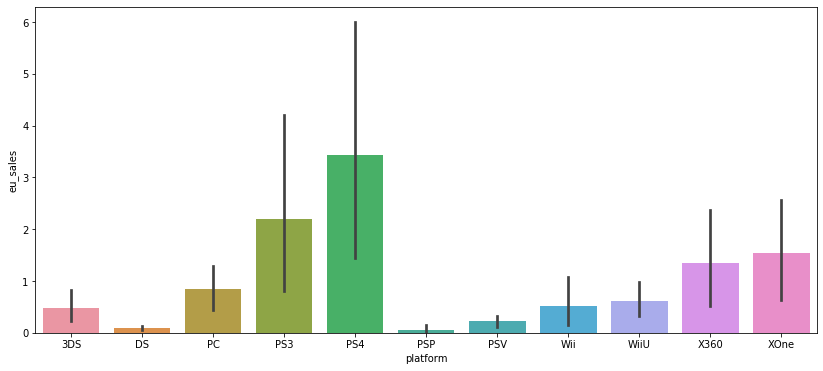

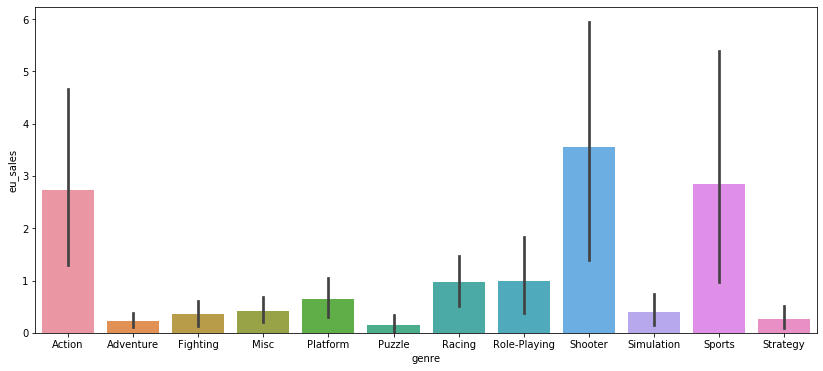

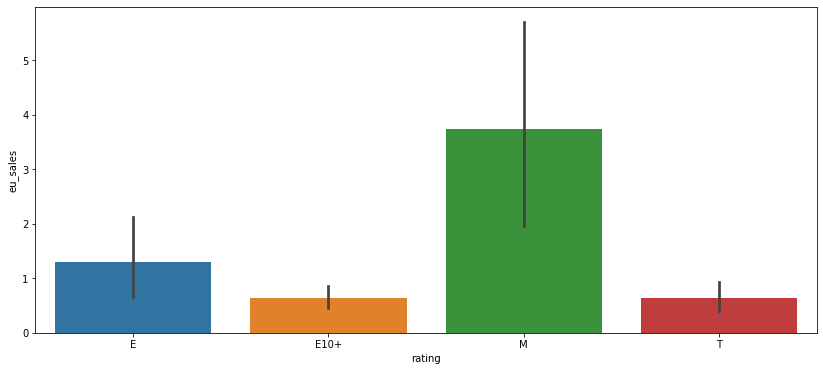

In [37]:
# Создание портрета пользователя для региона eu
plt.figure(figsize=(14, 6))
sns.barplot(x='platform', y='eu_sales', data=data_actual_games_out_stat_3)
plt.figure(figsize=(14, 6))
sns.barplot(x='genre', y='eu_sales', data=data_actual_games_out_stat_3)
plt.figure(figsize=(14, 6))
sns.barplot(x='rating', y='eu_sales', data=data_actual_games_out_stat_3)

В Европе высокую популярность имеют PS3 и PS4, хотя XBOX не отстает от них. Очень высокая популярность PC по сравнению с другими регионами.
Популоярные жанры: Shooter, Sports, Action
Игры покупаются преимущественно с рейтингом для взрослой аудитории.

# Вывод
В следующем году игроделам стоит ориентироваться на консоли нового поколения, так как спрос будет расти во всех регионах. 
Самый перспективный жанр Action - он актуален во всех регионах.
Если планируется разработка РПГ, то стоит обратить внимание на JP регион и ручные консоли.
Шутеры и спорт популярны в Европе и Америке.
Во всех регионах самый продаваемый рейтинг - M.

# Шаг 5. Проверьте гипотезы

In [38]:
# test

In [39]:
import statsmodels.api as sm

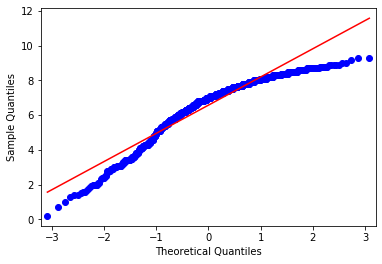

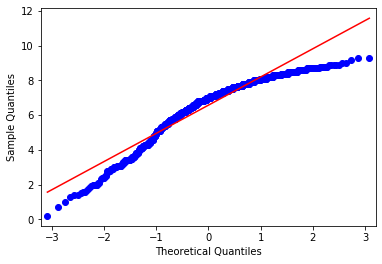

In [40]:
# Визуальный тест на нормальность распределения
data_actual_games_not_nan = data_actual_games_out[data_actual_games_out['user_score'].notnull()]
sm.qqplot(data_actual_games_not_nan['user_score'], line='s')

In [41]:
# распределение не нормально

In [42]:
# test

In [43]:
# Создаем функцию для проверки нормальности и проверки гипотез
def equal_mean_test(sample_1: 'Series', sample_2: 'Series'):
    
    shapiro_stat_1, shapiro_p_1 = st.shapiro(sample_1)
    shapiro_stat_2, shapiro_p_2 = st.shapiro(sample_2)
    alpha = .05
    print(shapiro_p_1)
    print(shapiro_p_2)
    
    if shapiro_p_1 < alpha and shapiro_p_2 < alpha:
        u_alpha = 0.1
        u_results = .01
        u_results = st.mannwhitneyu(sample_1, sample_2, alternative='two-sided')
        print('Нулевая гипотеза о нормальности распределения отвергается')
        print('Равенство средних проверяется тестом Манна-Уитни')
        print('p-значение: {:.10f}'.format(u_results.pvalue))
        if u_results.pvalue < alpha:
            print('Отвергаем нулевую гипотезу')
        else:
            print('Не получилось отвергнуть нулевую гипотезу')
    
    if shapiro_p_1 >= alpha and shapiro_p_2 >= alpha:
        t_alpha = .01
        equal_var = equal_var_test(sample_1, sample_2)
        t_results = st.ttest_ind(sample_1, sample_2, equal_var=equal_var)
        print('Нулевая гипотеза о нормальности распределения не отвергается')
        print('Равенство средних проверяется t-тестом Стьюдента')
        print('var-значение серии 1', np.var(sample_1))
        print('var-значение серии 2', np.var(sample_2))
        print('p-значение: {:.10f}'.format(t_results.pvalue))
        if t_results.pvalues < t_alpha:
            print('Отвергаем нулевую гипотезу')
        else:
            print("Не получилось отвергнуть нулевую гипотезу")

In [44]:
# Нулевая: средние пользовательские рейтинги платформ Xbox One и PC одинаковые.
# Альтернативная: средние пользовательские рейтинги платформ Xbox One и PC разные.
equal_mean_test((data_actual_games_not_nan['user_score'][data_actual_games_not_nan['platform']=='XOne']), 
                (data_actual_games_not_nan['user_score'][data_actual_games_not_nan['platform']=='PC']))

1.412490655638976e-05
7.772308890707791e-06
Нулевая гипотеза о нормальности распределения отвергается
Равенство средних проверяется тестом Манна-Уитни
p-значение: 0.5215008220
Не получилось отвергнуть нулевую гипотезу


Для выбранного уровня значимости не происходит отвержение нулевой теории. Делаем вывод, средние пользовательские рейтинги платформ Xbox One и PC одинаковые, т.к. нулевая гипотеза для двухстороннего теста всегда говорит о равенсте средних.

In [45]:
# Средние пользовательские рейтинги жанров Action и Sports одинаковые.
# Средние пользовательские рейтинги жанров Action и Sports разные.
equal_mean_test((data_actual_games_not_nan['user_score'][data_actual_games_not_nan['genre']=='Action']), 
                (data_actual_games_not_nan['user_score'][data_actual_games_not_nan['genre']=='Sports']))

4.6973425041167693e-14
0.04118402302265167
Нулевая гипотеза о нормальности распределения отвергается
Равенство средних проверяется тестом Манна-Уитни
p-значение: 0.0000000000
Отвергаем нулевую гипотезу


Для выбранного уровня значимости не происходит отвержение нулевой теории. Делаем вывод, что средние пользовательские рейтинги жанров Action и Sports разные, т.к. нулевая гипотеза для двухстороннего теста всегда говорит о равенсте средних.

# Вывод
Выбираем небольшую значимость, т.к. у нас достаточно конкретная цель - узнать, есть ли разница. Выводим две нулевые и две альтернативные гипотезы. Одна гипотеза подтвердилась, другая - нет.
По итогу:
- средние пользовательские рейтинги платформ Xbox One и PC одинаковые
- средние пользовательские рейтинги жанров Action и Sports разные

# Шаг 6. Напишите общий вывод

# Вывод
При аналитической работе были проведенны следующие исследования:
- поиск вероятных ошибок в данных из-за ПО
- найдены перспективные платформы
- срок жизни платформы
- исследованна зависимость продаж от отзывов как критиков, так и пользователей
- составлены портреты пользователей по трем регионам
- определенны востребованные жанры(как в общшей картине, так и по регионам)
- проверенны две гипотезы

Критичных  системных ошибок, влияющих на качество данных обнаруженно не было.
**

Самые перспективные платвформы, которые постепенно становяться монополистами на рынке видео игр - PS и XBOX. Следует ориентироваться на XOne и PS4.
**

Срок жизни платформы составляет пять-шесть лет, при нормальном распределении на все время существования(пик популярности в центре). Исключение составляет PC, который имеет ~равное знгачение в каждом году. Что рекомендует PC как стабильную платформу.
**

При продажах стоит ориентироваться на отзывы критиков. Как вариант, можно "поспособствовать роазвитию игровой журналистики", проплатив пару статей в крупных изданиях.
**

Средний пользователь Америки:
Данные пользолватели стараются поддерживать платформы производителя своей страны. На первом-втором местах находятся XBOX, на 3-4 PS. В данном регионе ценятся жанры: Action, Shooter, Sports Игры покупаются преимущественно с рейтингом для взрослой аудитории.

Средний пользователь Японии:
Данные пользователи являются патриотами и играют исключительно на платформах, которые разработали в данном регионе. Этьо объясняет отставание - на ящике с усами медиана продаж находится выше, но его лишили восточного рынка и из-за этого он проседает. Так же очень высокая популярность ручных консолей. Предпочитаемые жанры: RPG, Action Возрастной рейтинг: M, T и E

Средний пользователь Европы:
В Европе высокую популярность имеют PS3 и PS4, хотя XBOX не отстает от них. Очень высокая популярность PC по сравнению с другими регионами. Популоярные жанры: Shooter, Sports, Action Игры покупаются преимущественно с рейтингом для взрослой аудитории.
**

Самые популярные жанры по регионам были расписанны выше. В картине вцелом доминируют:
1) Adventure
2) Shooter
3) Sports
4) RPG
**

Было выдвинуто две гипотезы:
- средние пользовательские рейтинги платформ Xbox One и PC одинаковые(Не отвергнута)
- средние пользовательские рейтинги жанров Action и Sports одинаковые(Отвергнута)
**

Исходя из информации, полученной при анализе данных, необходимо делать ставку на игру в жанре Action, которая выходит на одну из лидирующих платформ с потенциальным ростом(либо выход запланирован на обе платформы) - PS4 и/или XOne. 
В приоритете - PS4, так как данная платформа популярна во всех регионах.

Так же можно сконцентрировать внимание на жанре Shooter, который ориентирован на Америку и Европу.

Либо, если бюджет ограничен, это могла бы быть РПГ, расчитанная только на японского пользователя и выходящая на PS4 + ручные консоли.

Для пиар компании игры можно подключить игровые издания.